# Does the parental level of education affect their children exam score results?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
Students_data = pd.read_csv('StudentsPerformance.csv')
Students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print("Data type : ", type(Students_data))
print("Data dims : ", Students_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1000, 8)


In [4]:
print(Students_data.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [5]:
Students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Number of Parental Level Types : 6
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


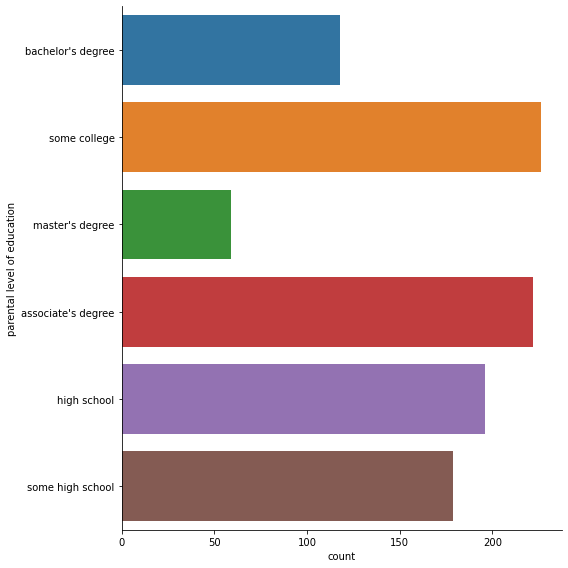

In [6]:
print("Number of Parental Level Types :", len(Students_data["parental level of education"].unique()))

print(Students_data["parental level of education"].value_counts())
sb.catplot(y = "parental level of education", data = Students_data, kind = "count", height = 8)

In [7]:
S_data = pd.DataFrame(Students_data[["math score", "reading score", "writing score"]])

S_data.describe().round(2)

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


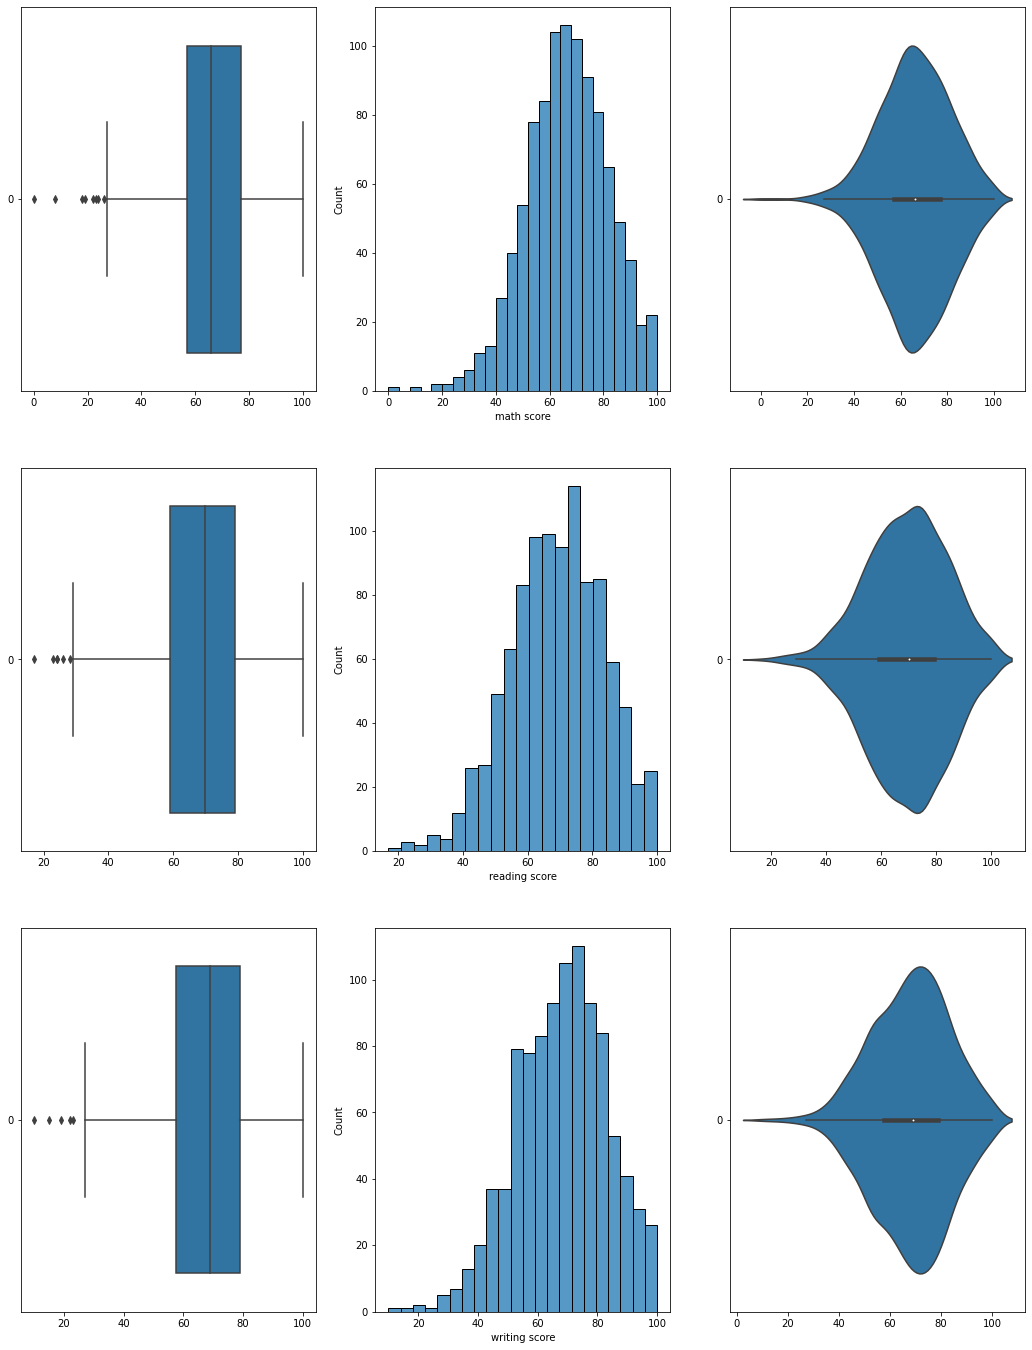

In [8]:
f, axes = plt.subplots(3, 3, figsize=(18, 24))

count = 0
for var in S_data:
    sb.boxplot(data = S_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = S_data[var], ax = axes[count,1])
    sb.violinplot(data = S_data[var], orient = "h", ax = axes[count,2])
    count += 1

In [9]:
print(S_data.corr())

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


S_data is data which consists of "math score", "reading score", "writing score".

<AxesSubplot:>

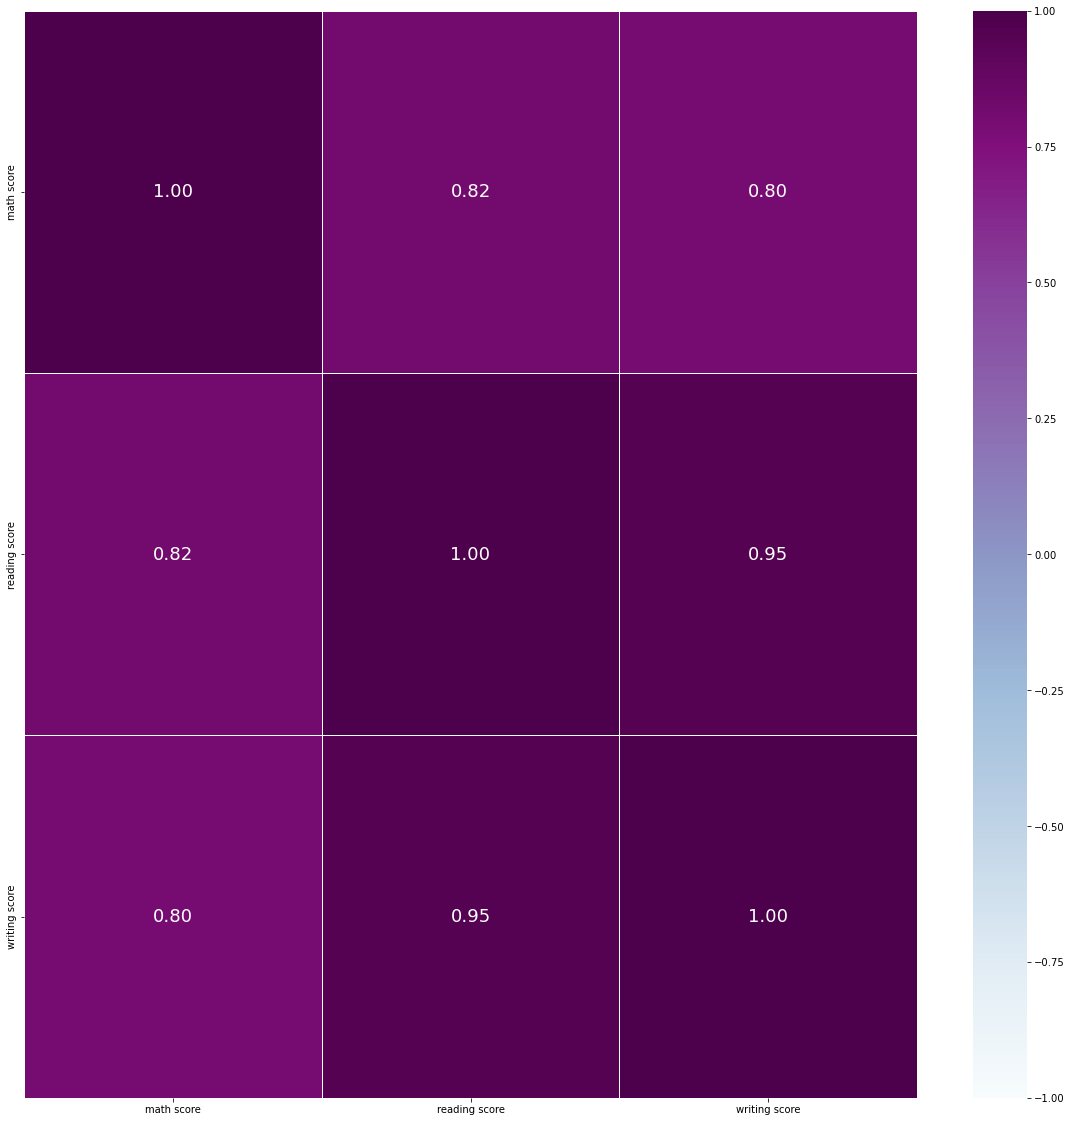

In [10]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(S_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18},cmap="BuPu")

<AxesSubplot:xlabel='writing score', ylabel='parental level of education'>

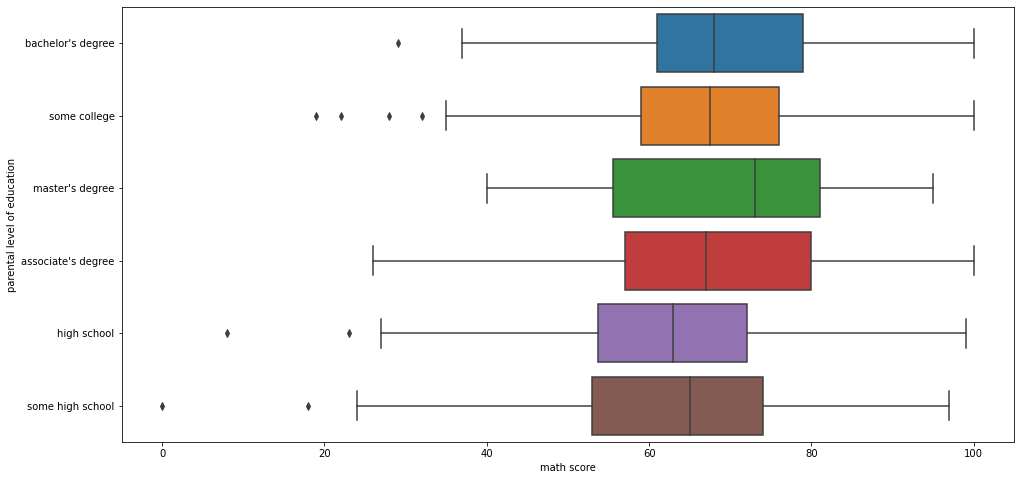

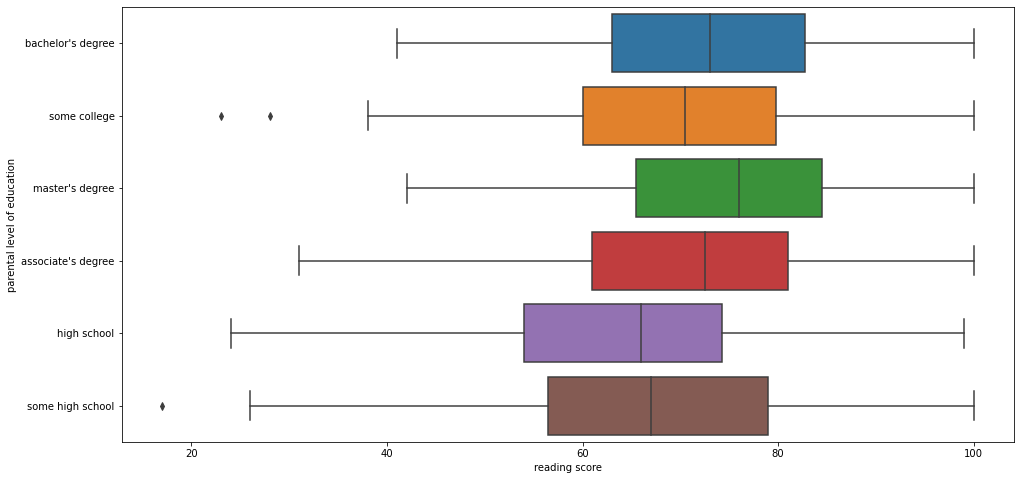

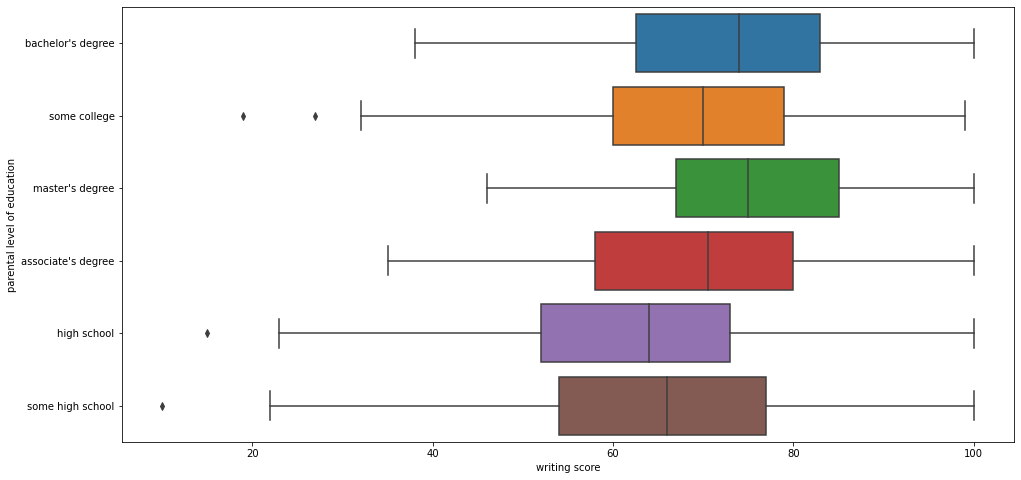

In [11]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'math score', y = 'parental level of education', data = Students_data)

f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'reading score', y = 'parental level of education', data = Students_data)

f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'writing score', y = 'parental level of education', data = Students_data)

It seems like students performed better when their parents have higher education, is that so?

In [12]:
conditions = [
    (Students_data["parental level of education"] == "bachelor's degree"),
    (Students_data["parental level of education"] == "master's degree"),
    (Students_data["parental level of education"] == "associate's degree"),
    (Students_data["parental level of education"] == "high school"),
    (Students_data["parental level of education"] == "some high school"),
    (Students_data["parental level of education"] == "some college")
]

values = ['Yes', 'Yes', 'Yes', 'No', 'No', 'No']

Students_data["Degree"] = np.select(conditions, values)

In [13]:
Students_data["Degree"]

0      Yes
1       No
2      Yes
3      Yes
4       No
      ... 
995    Yes
996     No
997     No
998     No
999     No
Name: Degree, Length: 1000, dtype: object

<AxesSubplot:xlabel='gender', ylabel='writing score'>

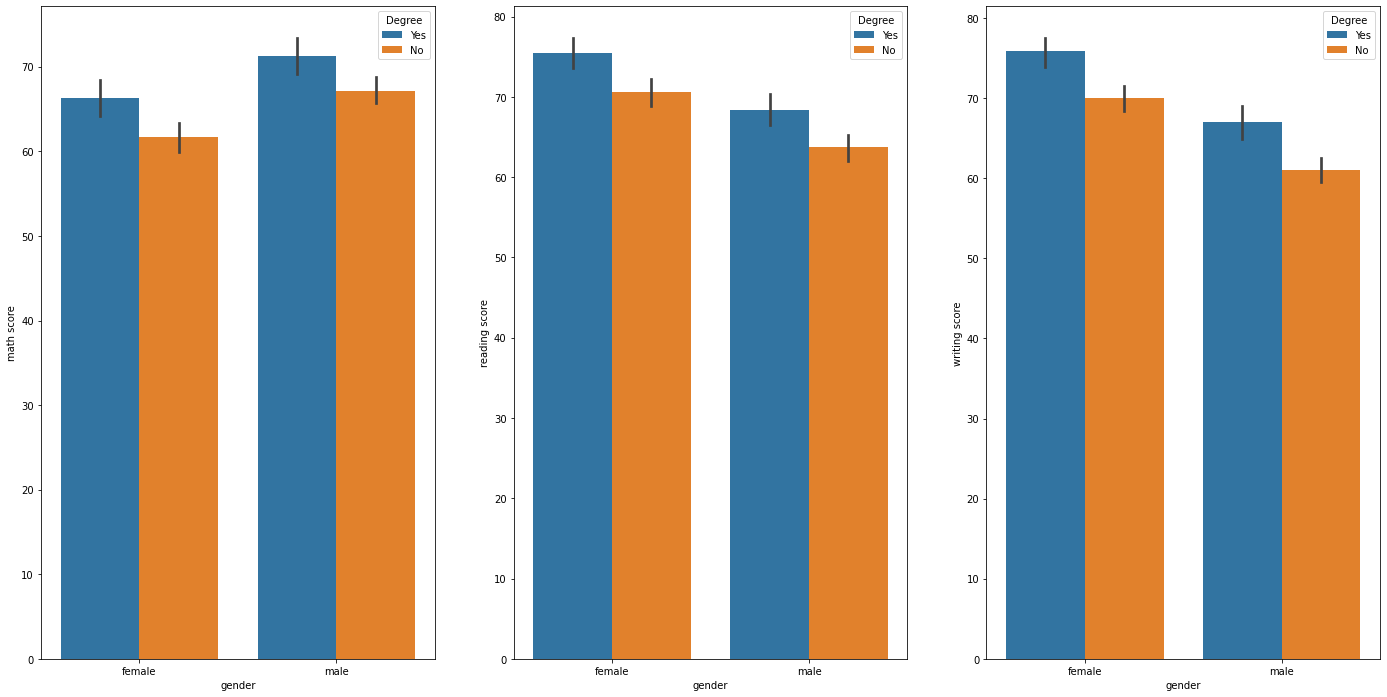

In [14]:
df=pd.DataFrame(Students_data)
f, axes = plt.subplots(1, 3, figsize=(24, 12))
sb.barplot(x='gender', y='math score', hue='Degree', data=df, ax = axes[0])

sb.barplot(x='gender', y='reading score', hue='Degree', data=df, ax = axes[1])

sb.barplot(x='gender', y='writing score', hue='Degree', data=df, ax = axes[2])

After adding another column to categorise parents which have degree and not, we can see from the bar chart that students performed better when their parents have a degree,but we shall see.

In [15]:
def remove_outliers(dataframe):
   Q1 = dataframe.quantile(0.25)
   Q3 = dataframe.quantile(0.75) 
    
   IQR = Q3 - Q1
    
   low_lim = Q1 - 1.5 * IQR
   up_lim = Q3 + 1.5 * IQR
    
   dataframe_final = dataframe[~((dataframe< (low_lim)) | (dataframe>(up_lim))).any(axis=1)]
   return dataframe_final


Union = pd.DataFrame(Students_data[["Degree", "math score","writing score","reading score"]])
Student_new = remove_outliers(Union)
Student_new.describe()

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/2151706322.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataframe_final = dataframe[~((dataframe< (low_lim)) | (dataframe>(up_lim))).any(axis=1)]


,math score,writing score,reading score
count,988.000000,988.000000,988.000000
mean,66.625506,68.566802,69.640688
std,14.409394,14.525267,14.016760
min,27.000000,27.000000,29.000000
25%,57.000000,58.000000,60.000000
50%,66.000000,69.000000,70.000000
75%,77.000000,79.000000,80.000000
max,100.000000,100.000000,100.000000


In [16]:
# Calculate the quartiles
Q1 = Union.quantile(0.25)
Q3 = Union.quantile(0.75)

# Rule to identify outliers
rule = ((Union < (Q1 - 1.5 * (Q3 - Q1))) | (Union > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/580141316.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  rule = ((Union < (Q1 - 1.5 * (Q3 - Q1))) | (Union > (Q3 + 1.5 * (Q3 - Q1))))


,Degree,math score,reading score,writing score
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [17]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [18]:
outliers.value_counts()

False    988
True      12
dtype: int64

<AxesSubplot:xlabel='writing score', ylabel='Degree'>

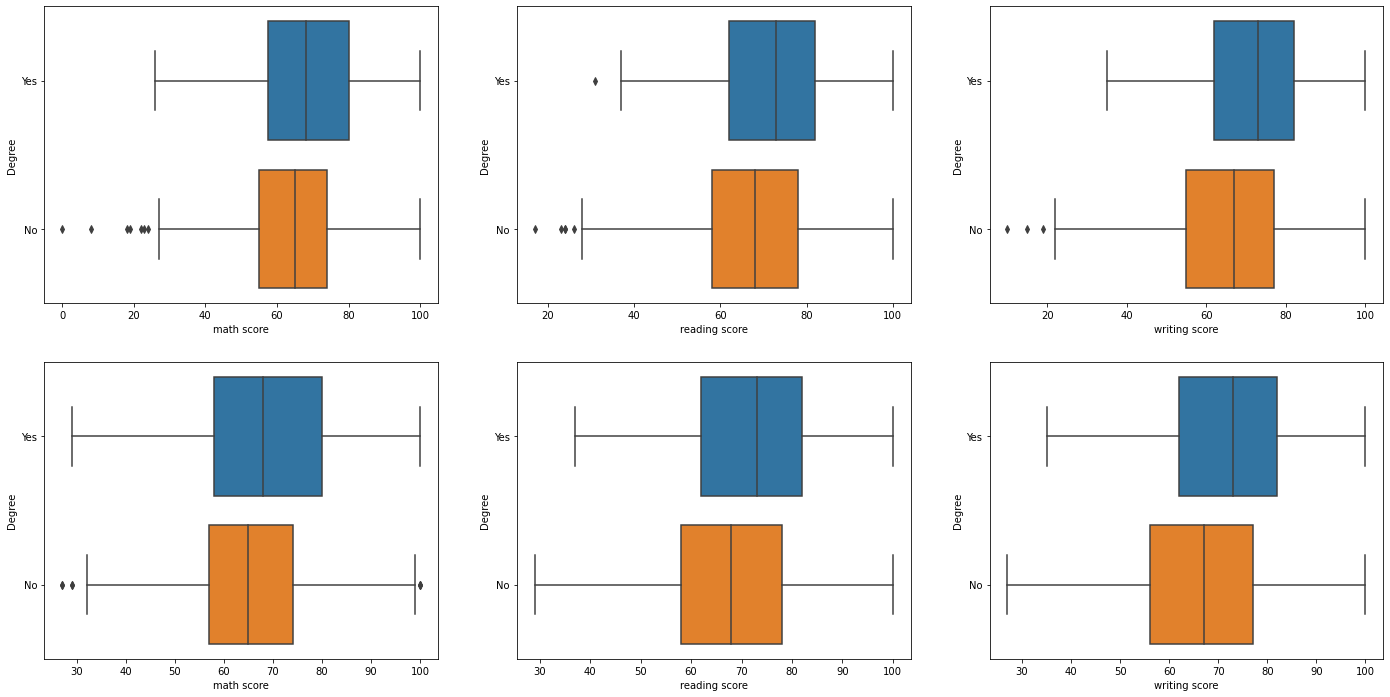

In [19]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(x = 'math score', y = 'Degree', data = Students_data, orient = "h", ax = axes[0,0])
sb.boxplot(x = 'reading score', y = 'Degree', data = Students_data, orient = "h",ax = axes[0,1])
sb.boxplot(x = 'writing score', y = 'Degree', data = Students_data, orient = "h", ax = axes[0,2])

sb.boxplot(x = 'math score', y = 'Degree' ,data = Student_new, orient = "h", ax = axes[1,0])
sb.boxplot(x = 'reading score', y = 'Degree', data = Student_new,orient = "h", ax = axes[1,1])
sb.boxplot(x = 'writing score', y = 'Degree', data = Student_new, orient = "h", ax = axes[1,2])

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y = pd.DataFrame(Student_new['Degree'])
X = pd.DataFrame(Student_new[["math score","reading score","writing score"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=55)

In [21]:
model = RandomForestClassifier(n_estimators=40,random_state=55)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/1082256800.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


In [22]:
print("Accuracy for Test =",model.score(X_test,y_test))

Accuracy for Test = 0.5404040404040404


In [23]:
print("Accuracy for Train =",model.score(X_train,y_train))

Accuracy for Train = 0.9924050632911392


In [24]:
conmatrixTrain= confusion_matrix(y_train, y_train_pred)
conmatrixTrain

array([[469,   2],
       [  4, 315]], dtype=int64)

In [25]:
tpTest = conmatrixTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

TPR Train :	 0.987460815047022
TNR Train :	 0.9957537154989384

FPR Train :	 0.004246284501061571
FNR Train :	 0.012539184952978056


Text(69.0, 0.5, 'Truth')

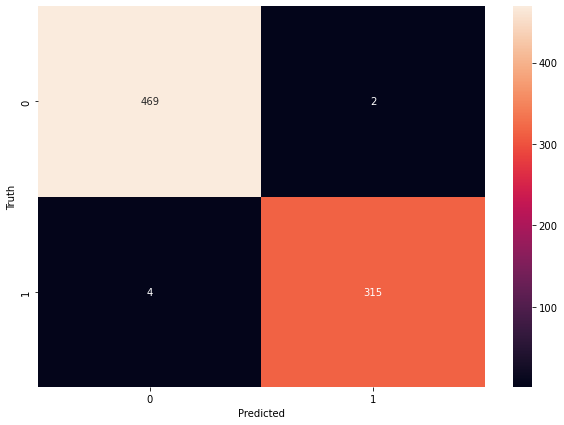

In [26]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTrain, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
conmatrix= confusion_matrix(y_test, y_test_pred)
conmatrix

array([[79, 40],
       [51, 28]], dtype=int64)

In [28]:
tpTest = conmatrix[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrix[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrix[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrix[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.35443037974683544
TNR Test :	 0.6638655462184874

FPR Test :	 0.33613445378151263
FNR Test :	 0.6455696202531646


Text(69.0, 0.5, 'Truth')

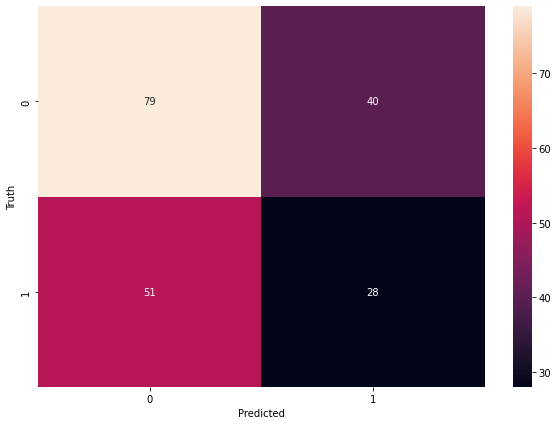

In [29]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrix, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

From the Test Set, we can tell conclude that whether parents have degree or not doesnt reall affect the score students get. As you can see from the heatmap, there are 50 students who score badly but their parents have a degree and there are 33 students who performed well even though their parents do not have any degree. whether parent have degree or not may be a causing factor but definitely wont be an important factor.

# Using Support Vector

In [287]:
yG = pd.DataFrame(Student_new['Degree'])
XG = pd.DataFrame(Student_new[["math score","reading score","writing score"]]) 

# Split the Dataset into Train and Test
X_trainG, X_testG, y_trainG, y_testG = train_test_split(XG, yG, test_size = 0.2,random_state=55)

In [288]:
from sklearn.svm import SVC
model = SVC(kernel='linear',random_state=55)

In [289]:
model.fit(X_trainG,y_trainG)

C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear', random_state=55)

In [290]:
model.score(X_trainG,y_trainG)

0.5962025316455696

In [291]:
model.score(X_testG,y_testG)

0.601010101010101

In [292]:
from sklearn.metrics import classification_report

In [293]:
y_train_predGH = model.predict(X_trainG)
y_test_predGH = model.predict(X_testG)

In [294]:
print(classification_report(y_trainG,y_train_predGH))

              precision    recall  f1-score   support

          No       0.60      1.00      0.75       471
         Yes       0.00      0.00      0.00       319

    accuracy                           0.60       790
   macro avg       0.30      0.50      0.37       790
weighted avg       0.36      0.60      0.45       790



C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [295]:
print(classification_report(y_testG,y_test_predGH))

              precision    recall  f1-score   support

          No       0.60      1.00      0.75       119
         Yes       0.00      0.00      0.00        79

    accuracy                           0.60       198
   macro avg       0.30      0.50      0.38       198
weighted avg       0.36      0.60      0.45       198



C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [296]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_trainG,y_trainG)

C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [305]:
gnb.score(X_trainG,y_trainG)

0.5974683544303797

In [297]:
gnb.score(X_testG,y_testG)

0.5757575757575758

In [306]:
y_train_predG = gnb.predict(X_trainG)
y_test_predG = gnb.predict(X_testG)

In [307]:
conmatrixTrainG= confusion_matrix(y_trainG, y_train_predG)
conmatrixTrainG

array([[357, 114],
       [204, 115]], dtype=int64)

In [308]:
conmatrixTrainG= confusion_matrix(y_trainG, y_train_predG)
conmatrixTrainG
tpTest = conmatrixTrainG[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTrainG[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTrainG[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTrainG[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

TPR Train :	 0.3605015673981191
TNR Train :	 0.7579617834394905

FPR Train :	 0.24203821656050956
FNR Train :	 0.6394984326018809


Text(69.0, 0.5, 'Truth')

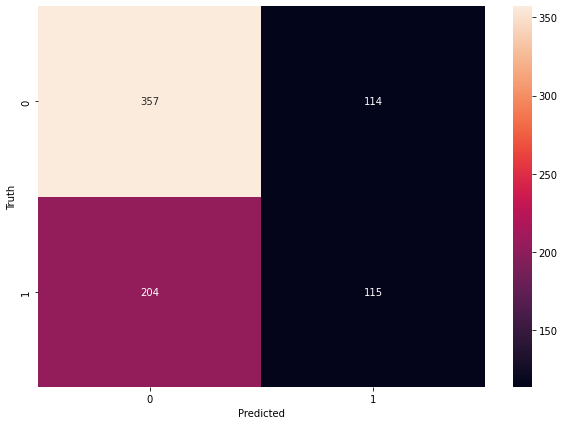

In [309]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTrainG, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [310]:
conmatrixTestG= confusion_matrix(y_testG, y_test_predG)
conmatrixTestG

array([[82, 37],
       [47, 32]], dtype=int64)

In [311]:
conmatrixTestG= confusion_matrix(y_testG, y_test_predG)
conmatrixTestG
tpTest = conmatrixTestG[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTestG[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTestG[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTestG[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.4050632911392405
TNR Test :	 0.6890756302521008

FPR Test :	 0.31092436974789917
FNR Test :	 0.5949367088607594


Text(69.0, 0.5, 'Truth')

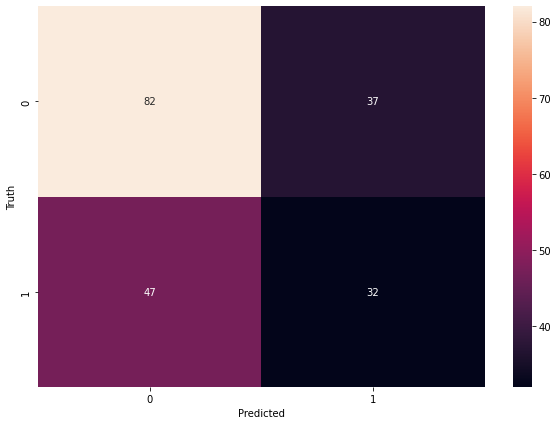

In [312]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTestG, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

<AxesSubplot:xlabel='gender', ylabel='writing score'>

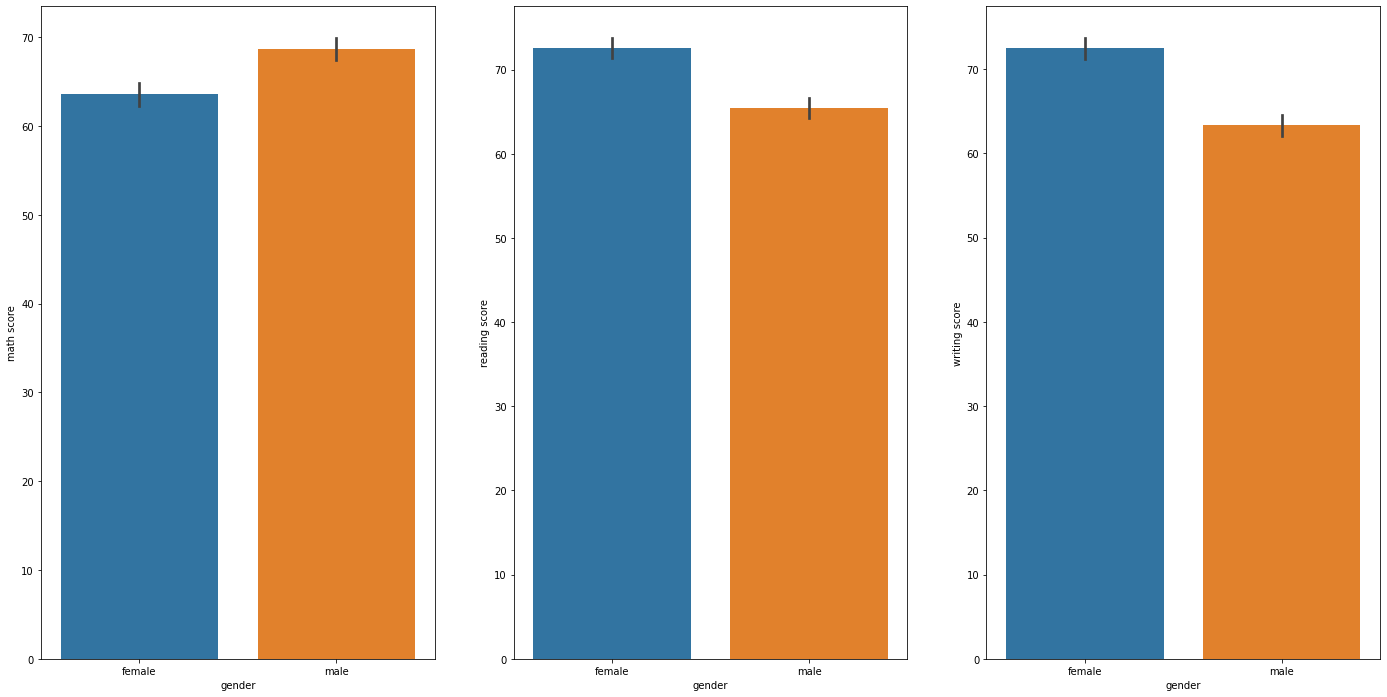

In [226]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.barplot(x = 'gender', y = 'math score', data = Students_data,ax = axes[0])
sb.barplot(x = 'gender', y = 'reading score', data = Students_data,ax = axes[1])
sb.barplot(x = 'gender', y = 'writing score', data = Students_data,ax = axes[2])

Looks like male are better in math than female.

# Next Question: Is Test Prep course important?

<AxesSubplot:xlabel='gender', ylabel='writing score'>

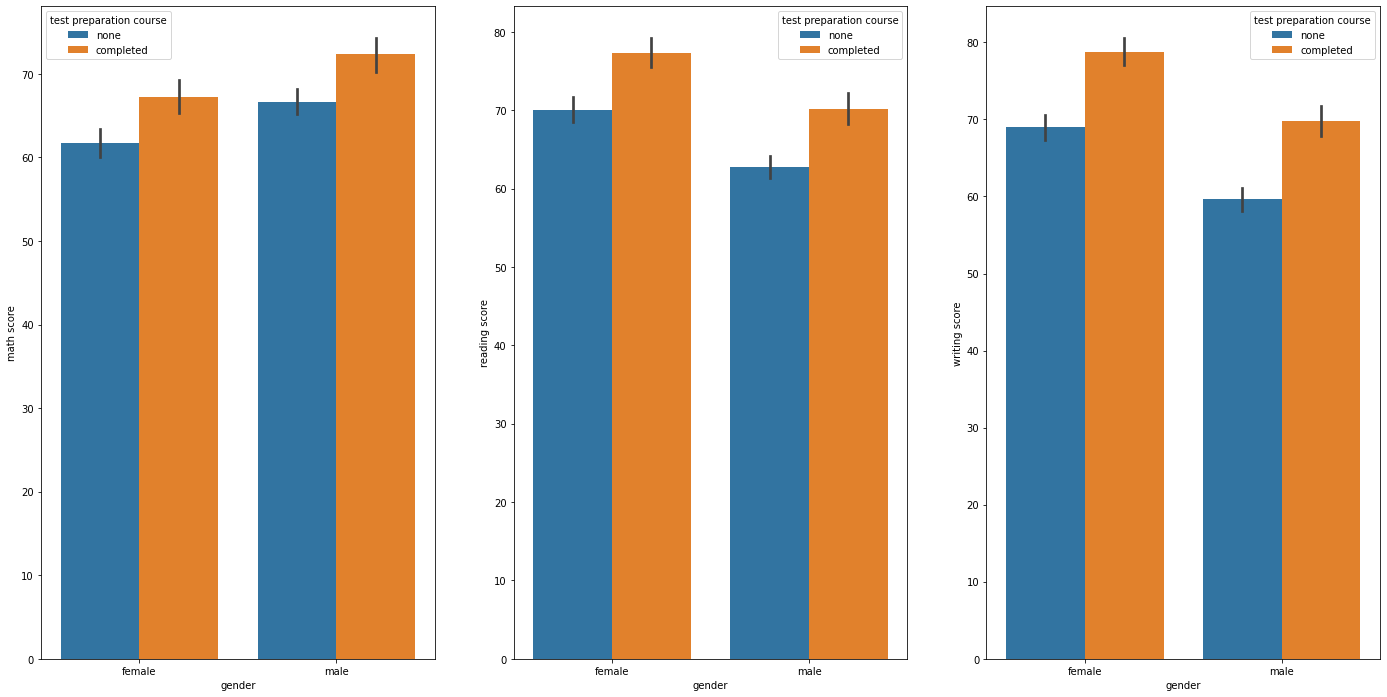

In [41]:
df=pd.DataFrame(Students_data)
f, axes = plt.subplots(1, 3, figsize=(24, 12))
sb.barplot(x='gender', y='math score', hue='test preparation course', data=df,ax = axes[0])

sb.barplot(x='gender', y='reading score', hue='test preparation course', data=df,ax = axes[1])

sb.barplot(x='gender', y='writing score', hue='test preparation course', data=df,ax = axes[2])

Test prep course seem like a very important factor to determine for good result, but is that so? We shall find out.

In [42]:
TestPrep = pd.DataFrame(Students_data[["test preparation course", "math score","writing score","reading score"]])
Student_Testprep = remove_outliers(TestPrep)
Student_Testprep.describe()

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/2151706322.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataframe_final = dataframe[~((dataframe< (low_lim)) | (dataframe>(up_lim))).any(axis=1)]


,math score,writing score,reading score
count,988.000000,988.000000,988.000000
mean,66.625506,68.566802,69.640688
std,14.409394,14.525267,14.016760
min,27.000000,27.000000,29.000000
25%,57.000000,58.000000,60.000000
50%,66.000000,69.000000,70.000000
75%,77.000000,79.000000,80.000000
max,100.000000,100.000000,100.000000


<AxesSubplot:xlabel='writing score', ylabel='test preparation course'>

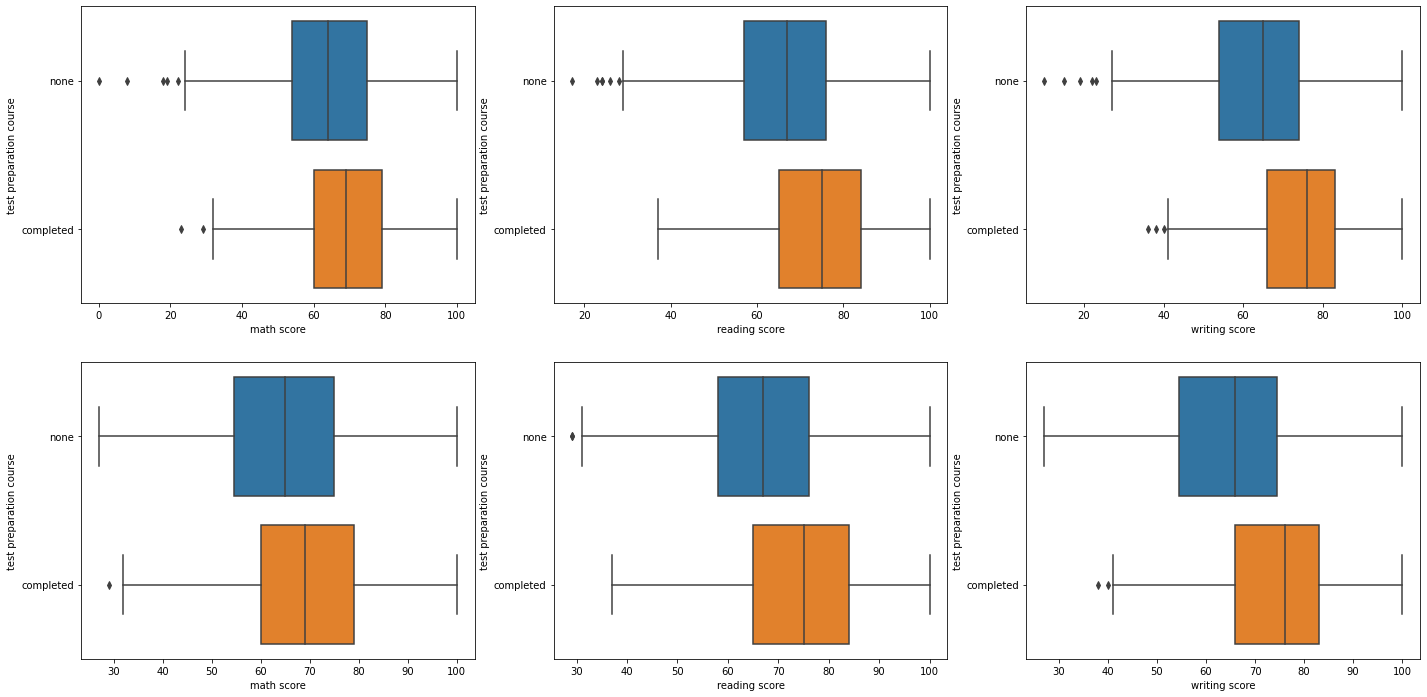

In [43]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(x = 'math score', y = 'test preparation course', data = Students_data, orient = "h", ax = axes[0,0])
sb.boxplot(x = 'reading score', y = 'test preparation course', data = Students_data, orient = "h",ax = axes[0,1])
sb.boxplot(x = 'writing score', y = 'test preparation course', data = Students_data, orient = "h", ax = axes[0,2])

sb.boxplot(x = 'math score', y = 'test preparation course' ,data = Student_Testprep, orient = "h", ax = axes[1,0])
sb.boxplot(x = 'reading score', y = 'test preparation course', data = Student_Testprep,orient = "h", ax = axes[1,1])
sb.boxplot(x = 'writing score', y = 'test preparation course', data = Student_Testprep, orient = "h", ax = axes[1,2])

In [44]:
y = pd.DataFrame(Student_Testprep['test preparation course'])
X = pd.DataFrame(Student_Testprep[["math score","reading score","writing score"]]) 

# Split the Dataset into Train and Test
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size = 0.2,random_state=55)


In [45]:
model = RandomForestClassifier(n_estimators=40,random_state=55)
model.fit(X_trainT,y_trainT)
y_train_predT = model.predict(X_trainT)
y_test_predT = model.predict(X_testT)

conmatrixTrainT= confusion_matrix(y_trainT, y_train_predT)
conmatrixTrainT
tpTest = conmatrixTrainT[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTrainT[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTrainT[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTrainT[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

TPR Train :	 0.996031746031746
TNR Train :	 0.9790209790209791

FPR Train :	 0.02097902097902098
FNR Train :	 0.003968253968253968


C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/597854747.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_trainT,y_trainT)


Text(69.0, 0.5, 'Truth')

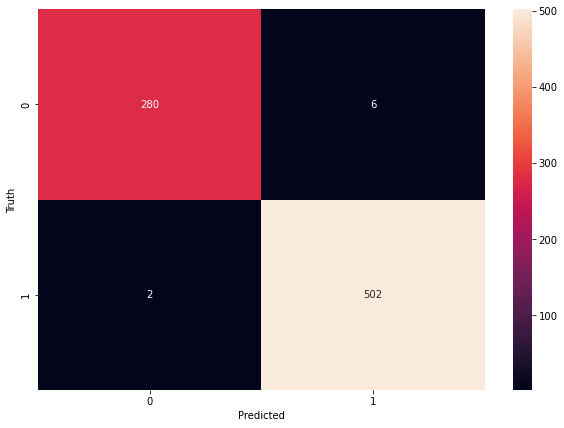

In [46]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTrainT, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
conmatrixTrainTTest= confusion_matrix(y_testT, y_test_predT)
conmatrixTrainTTest
tpTest = conmatrixTrainTTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTrainTTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTrainTTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTrainTTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.7244094488188977
TNR Test :	 0.4788732394366197

FPR Test :	 0.5211267605633803
FNR Test :	 0.2755905511811024


Text(69.0, 0.5, 'Truth')

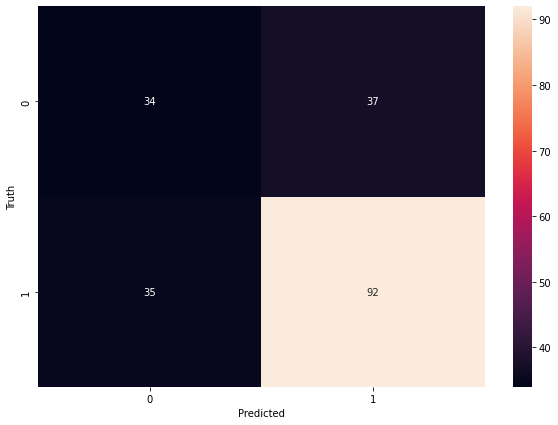

In [48]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTrainTTest, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

There are 88 people who performed well after attending the test preparation course. Even though there are 39 people who did not performed well after attending the test preparation course, but majority of the people performed well. Thus, Test preparation course is indeed an important factor.

# Using Support Vector

In [330]:
yH = pd.DataFrame(Student_Testprep['test preparation course'])
XH = pd.DataFrame(Student_Testprep[["math score","reading score","writing score"]]) 

In [331]:
# Split the Dataset into Train and Test
X_trainH, X_testH, y_trainH, y_testH = train_test_split(XH, yH, test_size = 0.2,random_state=55)

In [332]:
model = SVC(kernel='linear',random_state=55)
model.fit(X_trainH,y_trainH)

C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear', random_state=55)

In [333]:
y_train_predH = model.predict(X_trainH)
y_test_predH = model.predict(X_testH)

In [334]:
model.score(X_trainH,y_trainH)

0.6936708860759494

In [335]:
model.score(X_testH,y_testH)

0.6414141414141414

In [336]:
from sklearn.metrics import classification_report

In [337]:
y_train_predHG = model.predict(X_trainH)
y_test_predHG = model.predict(X_testH)

In [340]:
print(classification_report(y_trainH,y_train_predHG))

              precision    recall  f1-score   support

   completed       0.60      0.47      0.52       286
        none       0.73      0.82      0.77       504

    accuracy                           0.69       790
   macro avg       0.66      0.64      0.65       790
weighted avg       0.68      0.69      0.68       790



In [345]:
print(classification_report(y_testH,y_test_predHG))

              precision    recall  f1-score   support

   completed       0.50      0.45      0.47        71
        none       0.71      0.75      0.73       127

    accuracy                           0.64       198
   macro avg       0.60      0.60      0.60       198
weighted avg       0.63      0.64      0.64       198



In [346]:
gnb=GaussianNB()
gnb.fit(X_trainH,y_trainH)

C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [347]:
gnb.score(X_trainH,y_trainH)

0.6658227848101266

In [348]:
gnb.score(X_testH,y_testH)

0.5555555555555556

In [349]:
y_train_predH = gnb.predict(X_trainH)

In [350]:
y_test_predH = gnb.predict(X_testH)

In [351]:
conmatrixTrainH= confusion_matrix(y_trainH, y_train_predH)
conmatrixTrainH

array([[151, 135],
       [129, 375]], dtype=int64)

In [352]:
conmatrixTrainH= confusion_matrix(y_trainH, y_train_predH)
conmatrixTrainH
tpTest = conmatrixTrainH[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTrainH[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTrainH[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTrainH[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

TPR Train :	 0.7440476190476191
TNR Train :	 0.527972027972028

FPR Train :	 0.47202797202797203
FNR Train :	 0.25595238095238093


Text(69.0, 0.5, 'Truth')

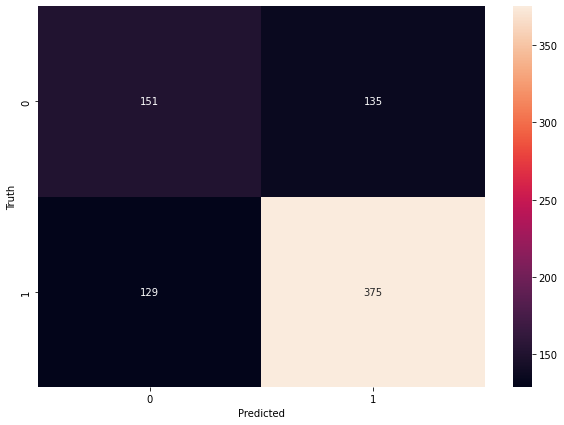

In [353]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTrainH, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [354]:
conmatrixTestH= confusion_matrix(y_testH, y_test_predH)
conmatrixTestH

array([[33, 38],
       [50, 77]], dtype=int64)

In [355]:
conmatrixTestH= confusion_matrix(y_testH, y_test_predH)
conmatrixTestH
tpTest = conmatrixTestH[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTestH[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTestH[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTestH[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.6062992125984252
TNR Test :	 0.4647887323943662

FPR Test :	 0.5352112676056338
FNR Test :	 0.3937007874015748


Text(69.0, 0.5, 'Truth')

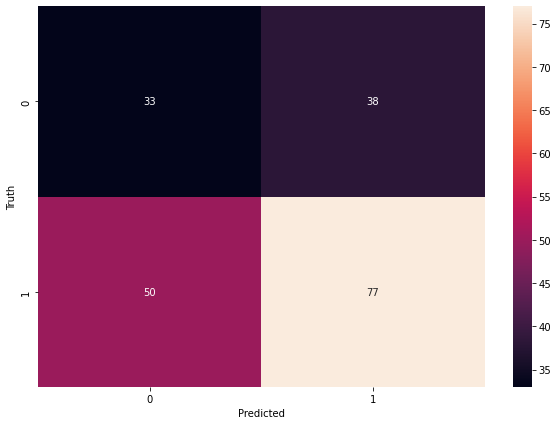

In [356]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTestH, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Having a proper lunch affects performance?

<AxesSubplot:xlabel='gender', ylabel='writing score'>

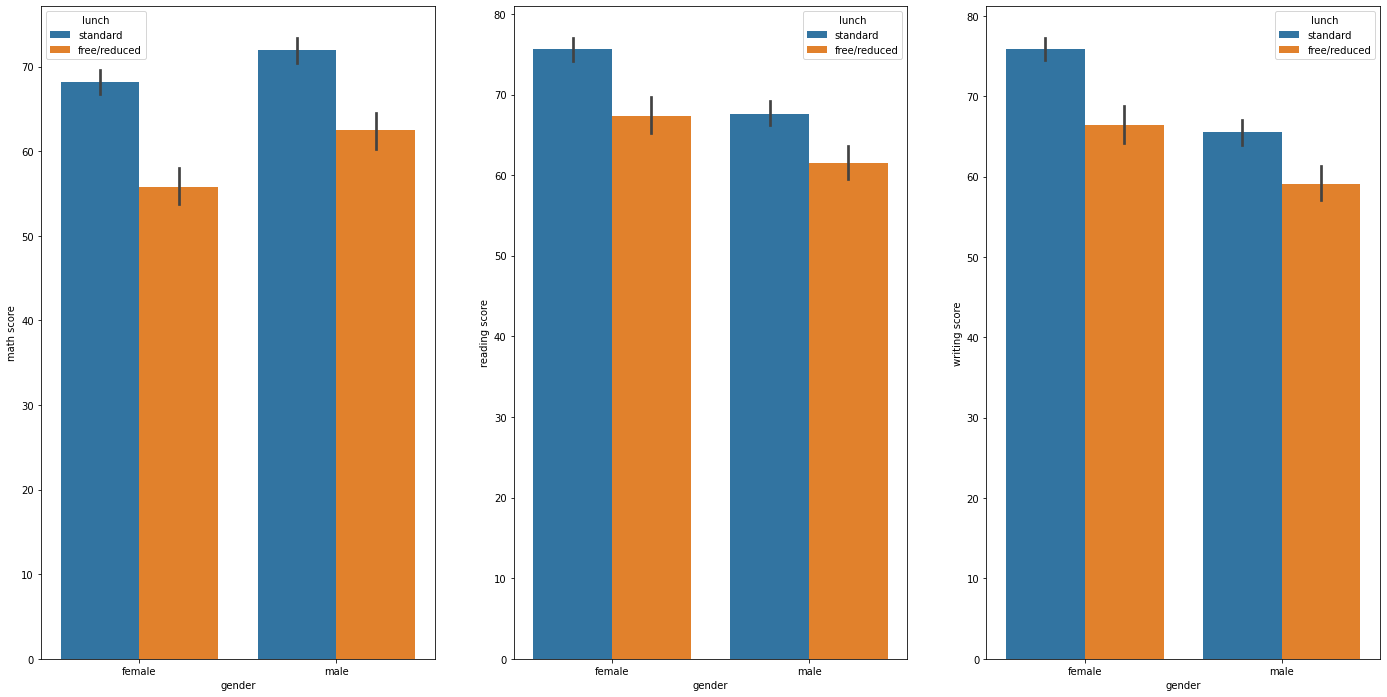

In [59]:
df=pd.DataFrame(Students_data)
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.barplot(x='gender', y='math score', hue='lunch', data=df, ax = axes[0])

sb.barplot(x='gender', y='reading score', hue='lunch', data=df, ax = axes[1])

sb.barplot(x='gender', y='writing score', hue='lunch', data=df, ax = axes[2])

Its normal for students to score well when they have a proper meal,from this barplot, it shows us that lunch is a factor which affect students' performance, but is that really so? Let's find it out.

In [60]:
Lunch = pd.DataFrame(Students_data[["lunch", "math score","writing score","reading score"]])
Student_Lunch = remove_outliers(Lunch)
Student_Lunch.describe()

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/2151706322.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataframe_final = dataframe[~((dataframe< (low_lim)) | (dataframe>(up_lim))).any(axis=1)]


,math score,writing score,reading score
count,988.000000,988.000000,988.000000
mean,66.625506,68.566802,69.640688
std,14.409394,14.525267,14.016760
min,27.000000,27.000000,29.000000
25%,57.000000,58.000000,60.000000
50%,66.000000,69.000000,70.000000
75%,77.000000,79.000000,80.000000
max,100.000000,100.000000,100.000000


<AxesSubplot:xlabel='writing score', ylabel='lunch'>

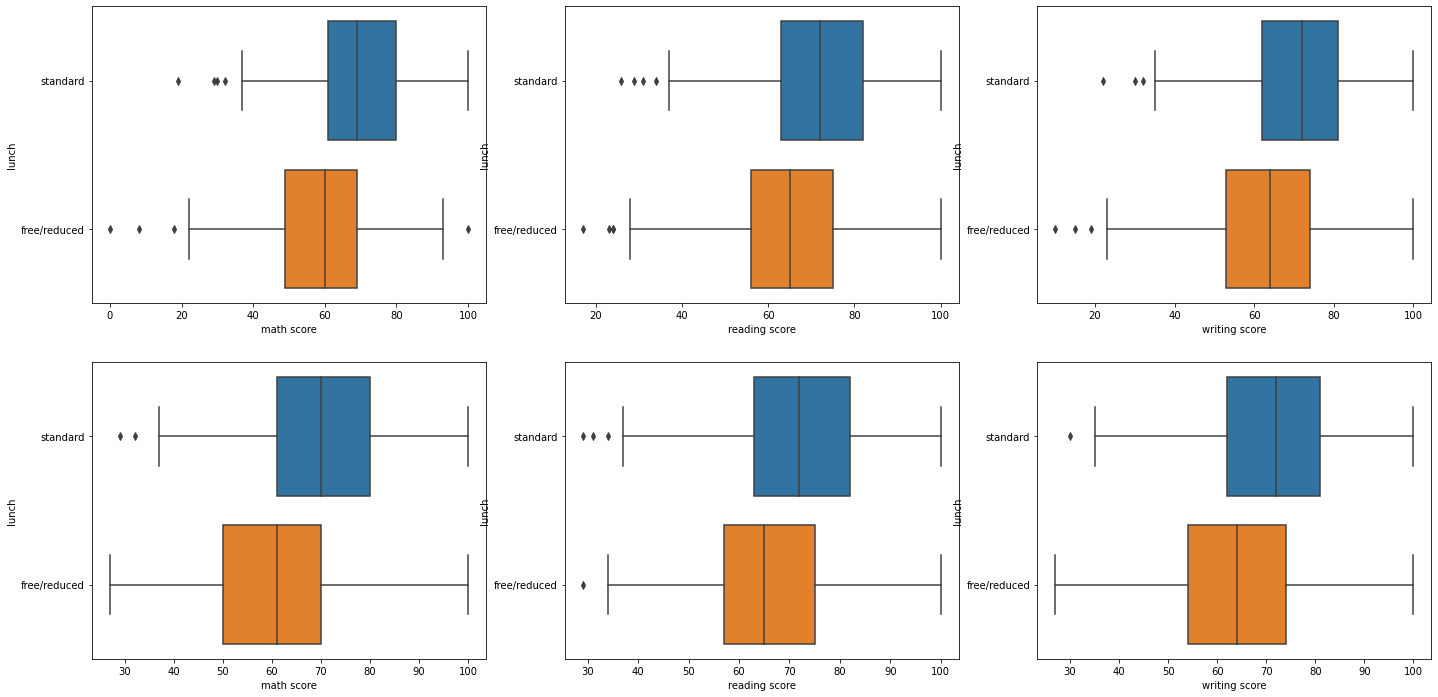

In [61]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(x = 'math score', y = 'lunch', data = Students_data, orient = "h", ax = axes[0,0])
sb.boxplot(x = 'reading score', y = 'lunch', data = Students_data, orient = "h",ax = axes[0,1])
sb.boxplot(x = 'writing score', y = 'lunch', data = Students_data, orient = "h", ax = axes[0,2])

sb.boxplot(x = 'math score', y = 'lunch' ,data = Student_Lunch, orient = "h", ax = axes[1,0])
sb.boxplot(x = 'reading score', y = 'lunch', data = Student_Lunch,orient = "h", ax = axes[1,1])
sb.boxplot(x = 'writing score', y = 'lunch', data = Student_Lunch, orient = "h", ax = axes[1,2])

In [62]:
y = pd.DataFrame(Student_Lunch['lunch'])
X = pd.DataFrame(Student_Lunch[["math score","reading score","writing score"]]) 

# Split the Dataset into Train and Test
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X, y, test_size = 0.2,random_state=55)

In [63]:
model = RandomForestClassifier(n_estimators=40,random_state=55)
model.fit(X_trainL,y_trainL)
y_train_predL = model.predict(X_trainL)
y_test_predL = model.predict(X_testL)

conmatrixTrainL= confusion_matrix(y_trainL, y_train_predL)
conmatrixTrainL
tpTest = conmatrixTrainL[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTrainL[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTrainL[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTrainL[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

TPR Train :	 0.9940119760479041
TNR Train :	 0.9792387543252595

FPR Train :	 0.020761245674740483
FNR Train :	 0.005988023952095809


C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/1076521733.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_trainL,y_trainL)


Text(69.0, 0.5, 'Truth')

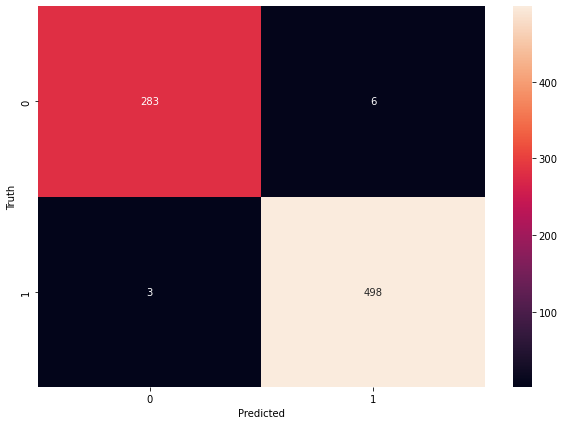

In [64]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTrainL, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
conmatrixTestL= confusion_matrix(y_testL, y_test_predL)
conmatrixTestL
tpTest = conmatrixTestL[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTestL[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTestL[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTestL[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.7816901408450704
TNR Test :	 0.30357142857142855

FPR Test :	 0.6964285714285714
FNR Test :	 0.21830985915492956


Text(69.0, 0.5, 'Truth')

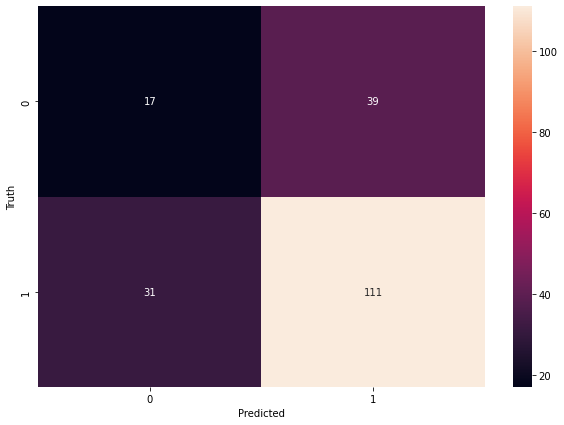

In [66]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTestL, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

It is obvious to see that there are 104 students who scored well after having a proper lunch. From this heatmap, we can conclude that lunch is definitely an important factor in determining students' performance.

# Using Support Vector

In [359]:
yI = pd.DataFrame(Student_Lunch['lunch'])
XI = pd.DataFrame(Student_Lunch[["math score","reading score","writing score"]]) 

In [360]:
X_trainI, X_testI, y_trainI, y_testI = train_test_split(XI, yI, test_size = 0.2,random_state=55)

In [361]:
model = SVC(kernel='linear',random_state=55)
model.fit(X_trainI,y_trainI)

C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear', random_state=55)

In [362]:
model.score(X_trainI,y_trainI)

0.6974683544303798

In [363]:
model.score(X_testI,y_testI)

0.7373737373737373

In [364]:
from sklearn.metrics import classification_report

In [365]:
y_train_predIH = model.predict(X_trainI)
y_test_predIH = model.predict(X_testI)

In [367]:
print(classification_report(y_trainI,y_train_predIH))

              precision    recall  f1-score   support

free/reduced       0.65      0.37      0.47       289
    standard       0.71      0.88      0.79       501

    accuracy                           0.70       790
   macro avg       0.68      0.63      0.63       790
weighted avg       0.69      0.70      0.67       790



In [368]:
print(classification_report(y_testI,y_test_predIH))

              precision    recall  f1-score   support

free/reduced       0.56      0.34      0.42        56
    standard       0.77      0.89      0.83       142

    accuracy                           0.74       198
   macro avg       0.67      0.62      0.63       198
weighted avg       0.71      0.74      0.71       198



In [369]:
gnb=GaussianNB()
gnb.fit(X_trainI,y_trainI)

C:\Users\LIM YAO XIAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [370]:
gnb.score(X_trainI,y_trainI)

0.6518987341772152

In [371]:
gnb.score(X_testI,y_testI)

0.696969696969697

In [372]:
y_train_predI = gnb.predict(X_trainI)
y_test_predI = gnb.predict(X_testI)

In [373]:
conmatrixTrainI= confusion_matrix(y_trainI, y_train_predI)
conmatrixTrainI

array([[148, 141],
       [134, 367]], dtype=int64)

In [374]:
conmatrixTrainI= confusion_matrix(y_trainI, y_train_predI)
conmatrixTrainI
tpTest = conmatrixTrainI[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTrainI[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTrainI[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTrainI[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

TPR Train :	 0.7325349301397206
TNR Train :	 0.5121107266435986

FPR Train :	 0.48788927335640137
FNR Train :	 0.26746506986027946


Text(69.0, 0.5, 'Truth')

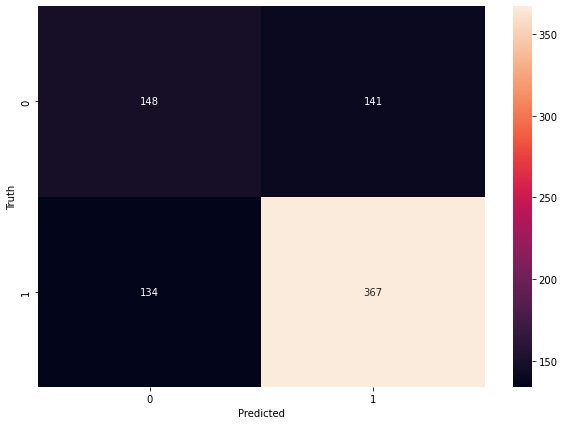

In [375]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTrainI, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [376]:
conmatrixTestI= confusion_matrix(y_testI, y_test_predI)
conmatrixTestI

array([[ 26,  30],
       [ 30, 112]], dtype=int64)

In [377]:
conmatrixTestI= confusion_matrix(y_testI, y_test_predI)
conmatrixTestI
tpTest = conmatrixTestI[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = conmatrixTestI[0][1] # False Positives : N (0) predicted Y (1)
tnTest = conmatrixTestI[0][0] # True Negatives : N (0) predicted N (0)
fnTest = conmatrixTestI[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

TPR Test :	 0.7887323943661971
TNR Test :	 0.4642857142857143

FPR Test :	 0.5357142857142857
FNR Test :	 0.2112676056338028


Text(69.0, 0.5, 'Truth')

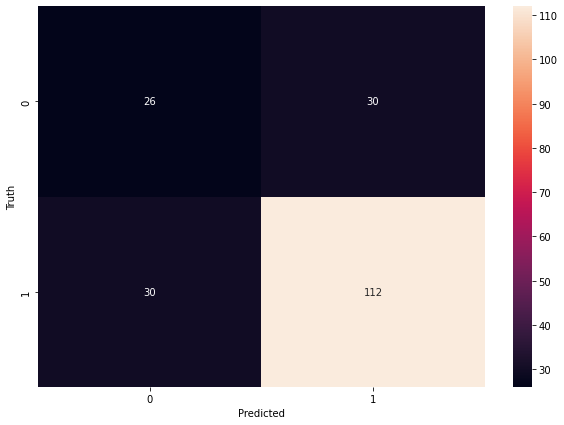

In [378]:
plt.figure(figsize=(10,7))
sb.heatmap(conmatrixTestI, annot=True,fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Random Forest Regression

In [77]:
print(S_data.corr())

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


<AxesSubplot:>

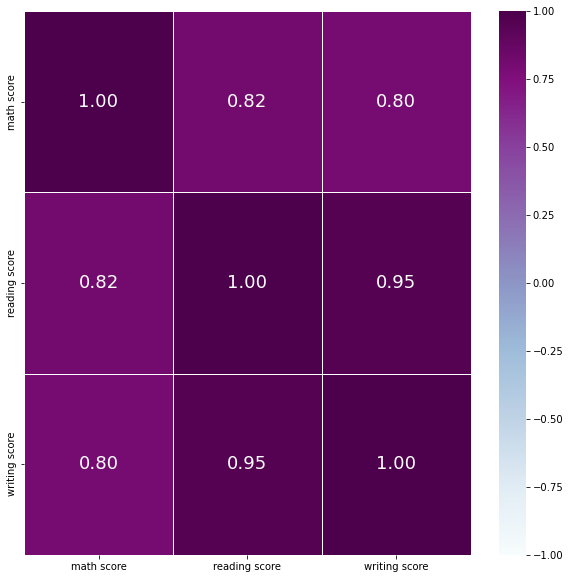

In [78]:
f = plt.figure(figsize=(10, 10))
sb.heatmap(S_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18},cmap="BuPu")

As we can see from this correlation matrix, we can see that the correlation are quite high. Let us find out if reading and writing score will affect math score and if reading score affects writing score by applying on random forest regression.

# Writing score vs Math score (Before removing outliers)

In [79]:
Students_data[["math score","writing score","reading score"]]

,math score,writing score,reading score
0,72,74,72
1,69,88,90
2,90,93,95
3,47,44,57
4,76,75,78
...,...,...,...
995,88,95,99
996,62,55,55
997,59,65,71
998,68,77,78


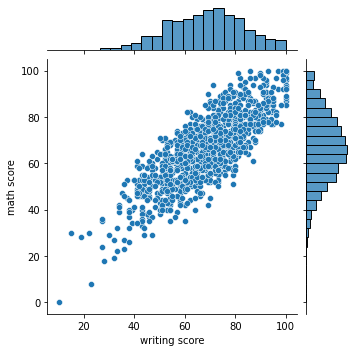

In [80]:
sb.jointplot(data = Students_data, x = "writing score", y = "math score", height = 5)

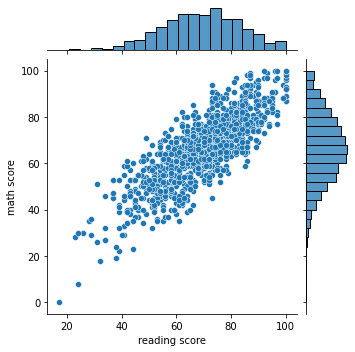

In [81]:
sb.jointplot(data = Students_data, x = "reading score", y = "math score", height = 5)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

ySB = pd.DataFrame(Students_data["math score"])
XSB = pd.DataFrame(Students_data["writing score"]) 

x_trainB, x_testB, y_trainB, y_testB = train_test_split(XSB, ySB, test_size = 0.2)

In [83]:
model = RandomForestRegressor(n_estimators = 100, random_state = 30)

RB = model.fit(x_trainB, y_trainB)

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/2924167011.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RB = model.fit(x_trainB, y_trainB)


In [84]:
Students_data.skew()

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/3553604499.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Students_data.skew()


math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score 

In [86]:
y_train_predSB = model.predict(x_trainB)
y_test_predSB = model.predict(x_testB)

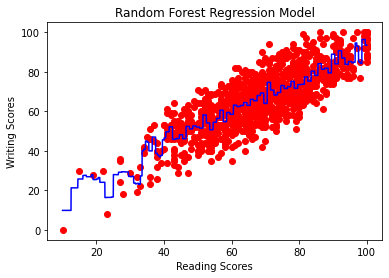

In [87]:
X_grid = np.arange(min(XSB.values), max(XSB.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(XSB, ySB, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression Model')
plt.xlabel('Reading Scores')
plt.ylabel('Writing Scores')
plt.show()

In [88]:
print('MAE: %.2f'% mean_absolute_error(y_trainB, y_train_predSB))
print('MSE: %.2f'% mean_squared_error(y_trainB, y_train_predSB))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_trainB, y_train_predSB)))
print('EVS: %.2f'% explained_variance_score(y_trainB, y_train_predSB))

MAE: 6.92
MSE: 72.50
RMSE: 8.51
EVS: 0.68


In [89]:
print('R^2 of train: %.2f' % r2_score(y_trainB, y_train_predSB))

R^2 of train: 0.68


In [90]:
print('R^2 of test: %.2f' % r2_score(y_testB, y_test_predSB))

R^2 of test: 0.62


In [91]:
print('MAE: %.2f'% mean_absolute_error(y_testB, y_test_predSB))
print('MSE: %.2f'% mean_squared_error(y_testB, y_test_predSB))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_testB, y_test_predSB)))
print('EVS: %.2f'% explained_variance_score(y_testB, y_test_predSB))

MAE: 7.70
MSE: 88.94
RMSE: 9.43
EVS: 0.62


# Writing score vs Math score (After removing outliers)

In [92]:
Scores = pd.DataFrame(Students_data[["math score","writing score","reading score"]])
Student_Scores = remove_outliers(Scores)
Student_Scores.describe()

,math score,writing score,reading score
count,988.000000,988.000000,988.000000
mean,66.625506,68.566802,69.640688
std,14.409394,14.525267,14.016760
min,27.000000,27.000000,29.000000
25%,57.000000,58.000000,60.000000
50%,66.000000,69.000000,70.000000
75%,77.000000,79.000000,80.000000
max,100.000000,100.000000,100.000000


<AxesSubplot:>

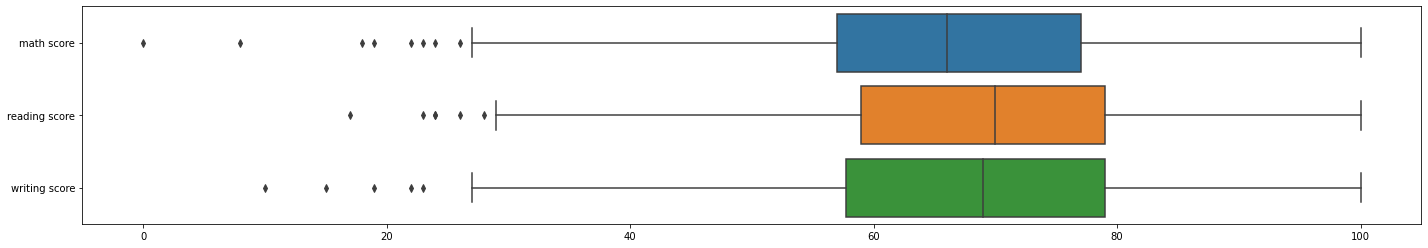

In [93]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = Students_data, orient = "h")

<AxesSubplot:>

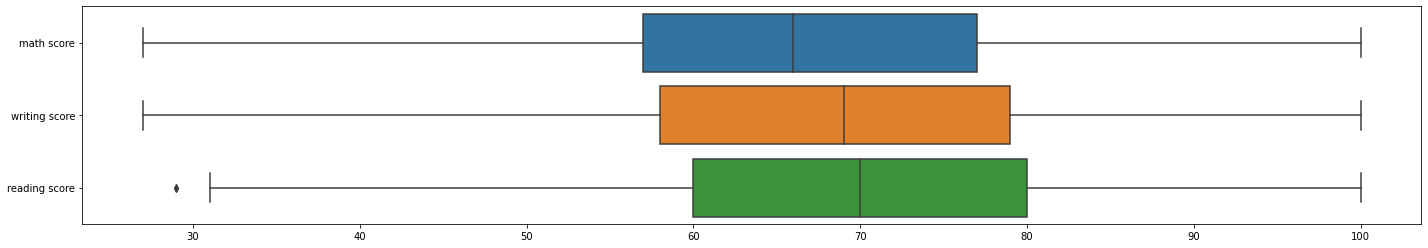

In [94]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = Student_Scores, orient = "h")

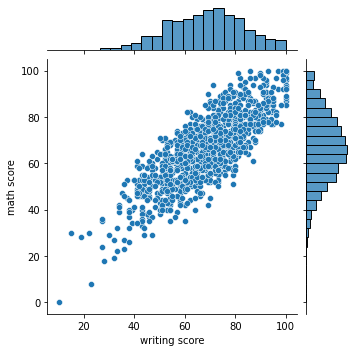

In [95]:
sb.jointplot(data = Students_data, x = "writing score", y = "math score", height = 5)

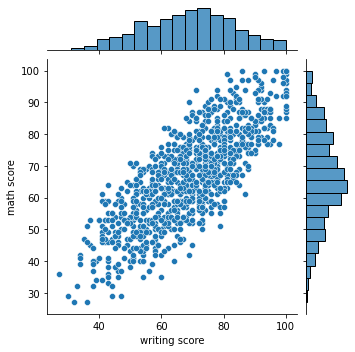

In [96]:
sb.jointplot(data = Student_Scores, x = "writing score", y = "math score", height = 5)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

yS = pd.DataFrame(Student_Scores["math score"])
XS = pd.DataFrame(Student_Scores["writing score"]) 

x_train, x_test, y_train, y_test = train_test_split(XS, yS, test_size = 0.2)


In [98]:
model = RandomForestRegressor(n_estimators = 100, random_state = 30)

model.fit(x_train, y_train)

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/916651748.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(random_state=30)

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score 

In [100]:
y_train_predS = model.predict(x_train)
y_test_predS = model.predict(x_test)

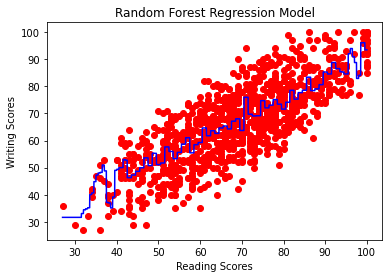

In [101]:
X_grid = np.arange(min(XS.values), max(XS.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(XS, yS, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression Model')
plt.xlabel('Reading Scores')
plt.ylabel('Writing Scores')
plt.show()

In [102]:
print('R^2 of train: %.2f' % r2_score(y_train, y_train_predS))

R^2 of train: 0.62


In [103]:
print('MAE: %.2f'% mean_absolute_error(y_train, y_train_predS))
print('MSE: %.2f'% mean_squared_error(y_train, y_train_predS))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_train, y_train_predS)))
print('EVS: %.2f'% explained_variance_score(y_train, y_train_predS))

MAE: 7.08
MSE: 75.69
RMSE: 8.70
EVS: 0.62


In [104]:
print('R^2 of test: %.2f' % r2_score(y_test, y_test_predS))

R^2 of test: 0.68


In [105]:
print('MAE: %.2f'% mean_absolute_error(y_test, y_test_predS))
print('MSE: %.2f'% mean_squared_error(y_test, y_test_predS))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_test, y_test_predS)))
print('EVS: %.2f'% explained_variance_score(y_test, y_test_predS))

MAE: 7.18
MSE: 77.95
RMSE: 8.83
EVS: 0.68


In [106]:
Student_Scores.skew()

math score      -0.039100
writing score   -0.108731
reading score   -0.107881
dtype: float64

# For reading score vs math score (Before Removing Outliers)

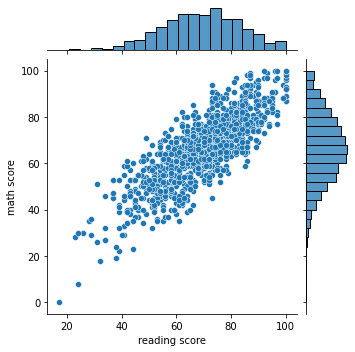

In [107]:
sb.jointplot(data = Students_data, x = "reading score", y = "math score", height = 5)

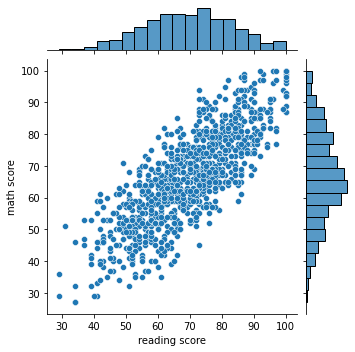

In [108]:
sb.jointplot(data = Student_Scores, x = "reading score", y = "math score", height = 5)

In [109]:
ySBR = pd.DataFrame(Students_data["math score"])
XSBR = pd.DataFrame(Students_data["reading score"]) 

x_trainBR, x_testBR, y_trainBR, y_testBR = train_test_split(XSBR, ySBR, test_size = 0.2)

In [110]:
model = RandomForestRegressor(n_estimators = 100, random_state = 30)

model.fit(x_trainBR, y_trainBR)

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/2591013378.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_trainBR, y_trainBR)


RandomForestRegressor(random_state=30)

In [111]:
y_train_predSBR = model.predict(x_trainBR)
y_test_predSBR = model.predict(x_testBR)

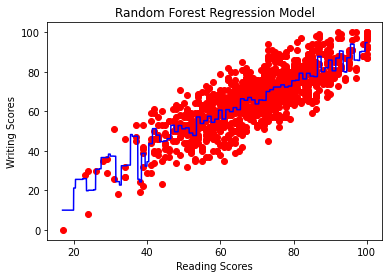

In [112]:
X_grid = np.arange(min(XSBR.values), max(XSBR.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(XSBR, ySBR, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression Model')
plt.xlabel('Reading Scores')
plt.ylabel('Writing Scores')
plt.show()

In [113]:
print('MAE: %.2f'% mean_absolute_error(y_trainBR, y_train_predSBR))
print('MSE: %.2f'% mean_squared_error(y_trainBR, y_train_predSBR))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_trainBR, y_train_predSBR)))
print('EVS: %.2f'% explained_variance_score(y_trainBR, y_train_predSBR))

MAE: 6.69
MSE: 69.67
RMSE: 8.35
EVS: 0.70


In [114]:
print('R^2 of train: %.2f' % r2_score(y_trainBR, y_train_predSBR))

R^2 of train: 0.70


In [115]:
print('R^2 of test: %.2f' % r2_score(y_testBR, y_test_predSBR))

R^2 of test: 0.62


In [116]:
print('MAE: %.2f'% mean_absolute_error(y_testBR, y_test_predSBR))
print('MSE: %.2f'% mean_squared_error(y_testBR, y_test_predSBR))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_testBR, y_test_predSBR)))
print('EVS: %.2f'% explained_variance_score(y_testBR, y_test_predSBR))

MAE: 7.40
MSE: 78.58
RMSE: 8.86
EVS: 0.62


# For reading score vs math score (After Removing Outliers)

In [117]:
ySR = pd.DataFrame(Student_Scores["math score"])
XSR = pd.DataFrame(Student_Scores["reading score"]) 

x_trainR, x_testR, y_trainR, y_testR = train_test_split(XSR, ySR, test_size = 0.2)

In [118]:
model = RandomForestRegressor(n_estimators = 100, random_state = 30)

model.fit(x_trainR, y_trainR)

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/1152931173.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_trainR, y_trainR)


RandomForestRegressor(random_state=30)

In [119]:
y_train_predSR = model.predict(x_trainR)
y_test_predSR = model.predict(x_testR)

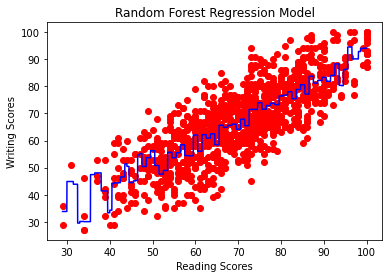

In [120]:
X_grid = np.arange(min(XSR.values), max(XSR.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(XSR, ySR, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression Model')
plt.xlabel('Reading Scores')
plt.ylabel('Writing Scores')
plt.show()

In [121]:
print('R^2 of train: %.2f' % r2_score(y_trainR, y_train_predSR))

R^2 of train: 0.68


In [122]:
print('MAE: %.2f'% mean_absolute_error(y_trainR, y_train_predSR))
print('MSE: %.2f'% mean_squared_error(y_trainR, y_train_predSR))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_trainR, y_train_predSR)))
print('EVS: %.2f'% explained_variance_score(y_trainR, y_train_predSR))

MAE: 6.60
MSE: 66.47
RMSE: 8.15
EVS: 0.68


In [123]:
print('R^2 of test: %.2f' % r2_score(y_testR, y_test_predSR))

R^2 of test: 0.59


In [124]:
print('MAE: %.2f'% mean_absolute_error(y_testR, y_test_predSR))
print('MSE: %.2f'% mean_squared_error(y_testR, y_test_predSR))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_testR, y_test_predSR)))
print('EVS: %.2f'% explained_variance_score(y_testR, y_test_predSR))

MAE: 7.47
MSE: 86.23
RMSE: 9.29
EVS: 0.59


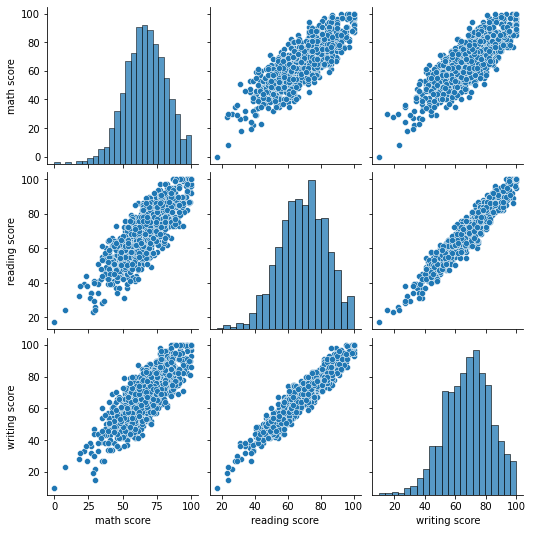

In [125]:
sb.pairplot(data = Students_data)

# Plot Before Removing Outliers (Writing score vs Math Score)

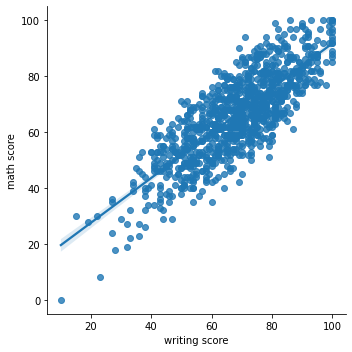

In [126]:
g = sb.lmplot(x="writing score", y="math score", data=Students_data)

# Plot After Removing Outliers (Writing score vs Math Score)

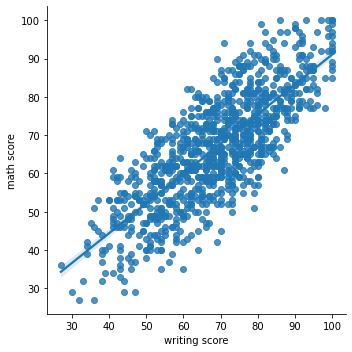

In [127]:
g = sb.lmplot(x="writing score", y="math score", data=Student_Scores)

# Plot Before Removing Outliers (Reading score vs Math Score)

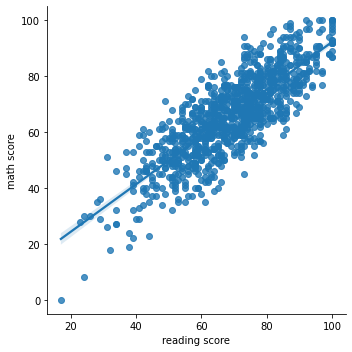

In [128]:
g = sb.lmplot(x="reading score", y="math score", data=Students_data)

# Plot After Removing Outliers (Reading score vs Math Score)

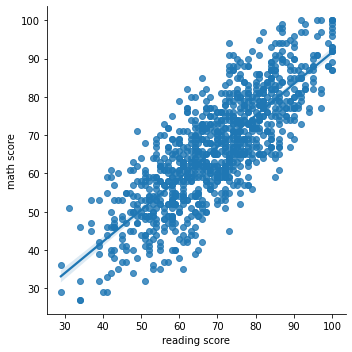

In [129]:
g = sb.lmplot(x="reading score", y="math score", data=Student_Scores)

# Writing score vs Reading score (Before removing outliers)

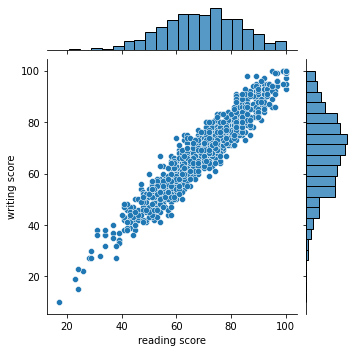

In [130]:
sb.jointplot(data = Students_data, x = "reading score", y = "writing score", height = 5)

In [131]:
ySBRR = pd.DataFrame(Students_data["writing score"])
XSBRR = pd.DataFrame(Students_data["reading score"]) 

x_trainBRR, x_testBRR, y_trainBRR, y_testBRR = train_test_split(XSBRR, ySBRR, test_size = 0.2)

In [132]:
model = RandomForestRegressor(n_estimators = 100, random_state = 30)

RB = model.fit(x_trainBRR, y_trainBRR)


C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/3833047577.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RB = model.fit(x_trainBRR, y_trainBRR)


In [133]:
y_train_predSBRR = model.predict(x_trainBRR)
y_test_predSBRR = model.predict(x_testBRR)

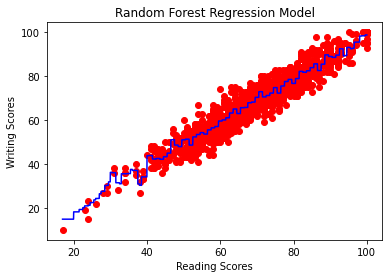

In [134]:
X_grid = np.arange(min(XSBRR.values), max(XSBRR.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(XSBRR, ySBRR, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression Model')
plt.xlabel('Reading Scores')
plt.ylabel('Writing Scores')
plt.show()

In [135]:
print('MAE: %.2f'% mean_absolute_error(y_trainBRR, y_train_predSBRR))
print('MSE: %.2f'% mean_squared_error(y_trainBRR, y_train_predSBRR))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_trainBRR, y_train_predSBRR)))
print('EVS: %.2f'% explained_variance_score(y_trainBRR, y_train_predSBRR))

MAE: 3.38
MSE: 18.17
RMSE: 4.26
EVS: 0.92


In [136]:
print('R^2 of train: %.2f' % r2_score(y_trainBRR, y_train_predSBRR))

R^2 of train: 0.92


In [137]:
print('R^2 of test: %.2f' % r2_score(y_testBRR, y_test_predSBRR))

R^2 of test: 0.90


In [138]:
print('MAE: %.2f'% mean_absolute_error(y_testBRR, y_test_predSBRR))
print('MSE: %.2f'% mean_squared_error(y_testBRR, y_test_predSBRR))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_testBRR, y_test_predSBRR)))
print('EVS: %.2f'% explained_variance_score(y_testBRR, y_test_predSBRR))

MAE: 4.02
MSE: 24.02
RMSE: 4.90
EVS: 0.90


# Writing score vs Reading score (After removing outliers)

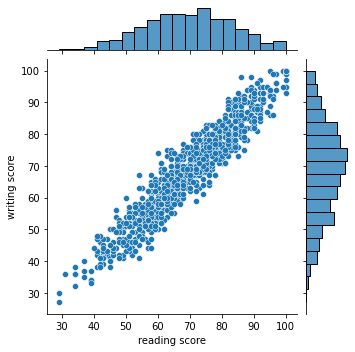

In [139]:
sb.jointplot(data = Student_Scores, x = "reading score", y = "writing score", height = 5)

In [140]:
ySRR = pd.DataFrame(Student_Scores["writing score"])
XSRR = pd.DataFrame(Student_Scores["reading score"]) 

x_trainRR, x_testRR, y_trainRR, y_testRR = train_test_split(XSRR, ySRR, test_size = 0.2)

In [141]:
model = RandomForestRegressor(n_estimators = 100, random_state = 30)

R = model.fit(x_trainRR, y_trainRR)

C:\Users\LIMYAO~1\AppData\Local\Temp/ipykernel_32712/611807502.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R = model.fit(x_trainRR, y_trainRR)


In [142]:
y_train_predSRR = model.predict(x_trainRR)
y_test_predSRR = model.predict(x_testRR)

In [143]:
print('MAE: %.2f'% mean_absolute_error(y_trainRR, y_train_predSRR))
print('MSE: %.2f'% mean_squared_error(y_trainRR, y_train_predSRR))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_trainRR, y_train_predSRR)))
print('EVS: %.2f'% explained_variance_score(y_trainRR, y_train_predSRR))

MAE: 3.46
MSE: 18.91
RMSE: 4.35
EVS: 0.91


In [144]:
print('R^2 of train: %.2f' % r2_score(y_trainRR, y_train_predSRR))

R^2 of train: 0.91


In [145]:
print('R^2 of test: %.2f' % r2_score(y_testRR, y_test_predSRR))

R^2 of test: 0.89


In [146]:
print('MAE: %.2f'% mean_absolute_error(y_testRR, y_test_predSRR))
print('MSE: %.2f'% mean_squared_error(y_testRR, y_test_predSRR))
print('RMSE: %.2f'% np.sqrt(mean_squared_error(y_testRR, y_test_predSRR)))
print('EVS: %.2f'% explained_variance_score(y_testRR, y_test_predSRR))

MAE: 3.70
MSE: 20.97
RMSE: 4.58
EVS: 0.89


# Plot Before Removing Outliers (Reading score vs Writing Score)

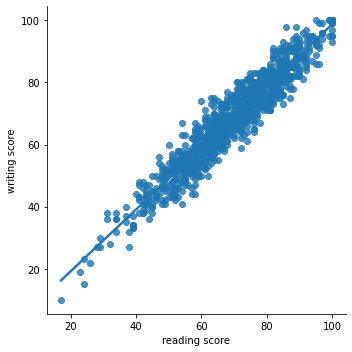

In [147]:
g = sb.lmplot(x="reading score", y="writing score", data=Students_data)

# Plot After Removing Outliers (Reading score vs Writing Score)

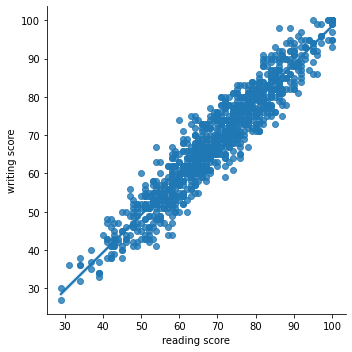

In [148]:
g = sb.lmplot(x="reading score", y="writing score", data=Student_Scores)

It is much more accurate about removing all the outliers and the accuracy of the model become better as compared to the model before removing the outliers.

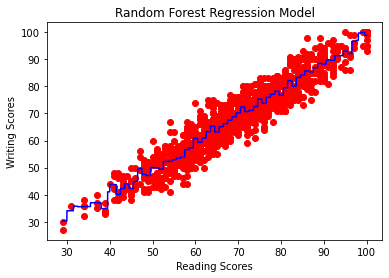

In [149]:
X_grid = np.arange(min(XSRR.values), max(XSRR.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(XSRR, ySRR, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression Model')
plt.xlabel('Reading Scores')
plt.ylabel('Writing Scores')
plt.show()

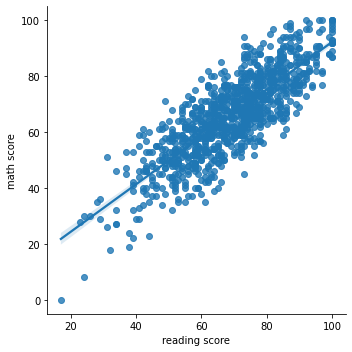

In [150]:
g = sb.lmplot(x="reading score", y="math score", data=Students_data)

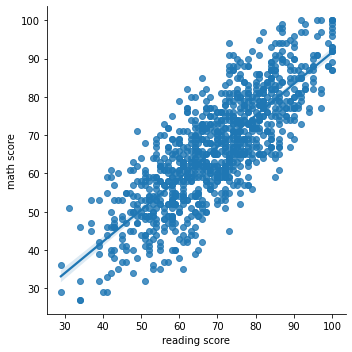

In [151]:
g = sb.lmplot(x="reading score", y="math score", data=Student_Scores)

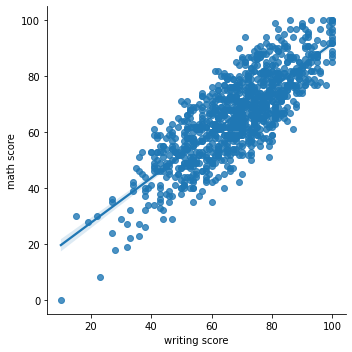

In [152]:
g = sb.lmplot(x="writing score", y="math score", data=Students_data)

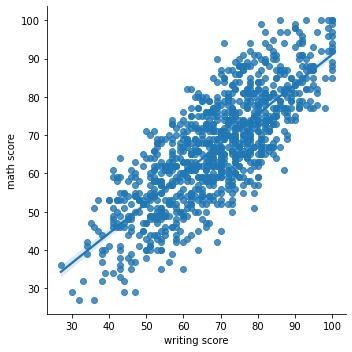

In [153]:
g = sb.lmplot(x="writing score", y="math score", data=Student_Scores)